> https://bcho.tistory.com/1203?category=555440

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(
    fname = 'c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

In [3]:
df = pd.read_csv('data/버스배제1.csv', encoding = 'euc_kr')
df.head(3)

,읍면동,주차수요량,WiFi 접속자수,카드이용자수,사업체수
0,이도동,611949,4783256,4538944,6694
1,연동,412007,3126565,4303620,4649
2,노형동,387717,4834174,4562480,4476


In [4]:
features = df.loc[:, ['주차수요량', '카드이용자수', '사업체수', 'WiFi 접속자수']]
features

,주차수요량,카드이용자수,사업체수,WiFi 접속자수
0,611949,4538944,6694,4783256
1,412007,4303620,4649,3126565
2,387717,4562480,4476,4834174
3,428583,2262602,2514,939748
4,189709,1377325,2174,450801
5,322347,3467293,1918,2471079
6,241003,2301873,2049,1552059
7,240915,2448666,3536,3617973
8,162620,952715,1738,565136
9,246395,1589216,1873,1677427


# 군집수 판단

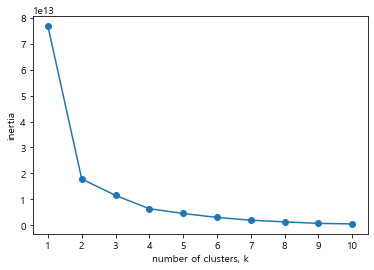

In [5]:
kmlist = []
for i in range(1,11):
    km = KMeans(n_clusters=i, algorithm='auto', random_state=42)
    km.fit(features)
    
    kmlist.append(km.inertia_)
plt.plot(range(1,11), kmlist, marker='o')
plt.xticks(range(1,11))
plt.xlabel('number of clusters, k' )
plt.ylabel('inertia')
plt.show()

In [6]:
scaler = StandardScaler()
minmaxdata= scaler.fit_transform(features)
pd.DataFrame(minmaxdata, columns = features.columns)

,주차수요량,카드이용자수,사업체수,WiFi 접속자수
0,2.668506,1.955231,2.822533,2.167317
1,1.273959,1.784888,1.549807,1.025981
2,1.104542,1.972267,1.442139,2.202396
3,1.389572,0.307471,0.221069,-0.480573
4,-0.276517,-0.333348,0.009466,-0.817421
5,0.648602,1.179502,-0.149858,0.574400
6,0.081247,0.335898,-0.068329,-0.058737
7,0.080633,0.442156,0.857121,1.364524
8,-0.465456,-0.640708,-0.261882,-0.738653
9,0.118855,-0.179968,-0.177864,0.027632


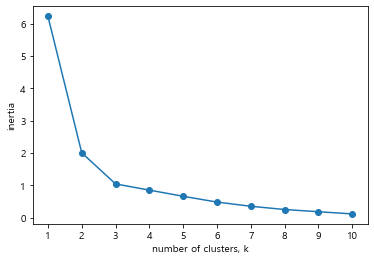

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
minmaxdata= scaler.fit_transform(features)

kmlist = []
for i in range(1,11):
    km = KMeans(n_clusters=i, algorithm='auto', random_state=42)
    km.fit(minmaxdata)
    
    kmlist.append(km.inertia_)

plt.xticks(range(1,11))
plt.xlabel('number of clusters, k' )
plt.ylabel('inertia')
plt.plot(range(1,11), kmlist, marker='o')
# 군집 중심에서 각 클러스터 내 점 거리 합산
plt.show()


In [8]:
model = KMeans(n_clusters=3, algorithm='auto')
model.fit(features)

predict = pd.DataFrame(model.predict(features)+1)
predict.columns = ['군집']
predict

,군집
0,2
1,2
2,2
3,1
4,3
5,1
6,1
7,1
8,3
9,1


In [9]:
r = pd.concat([df['읍면동'] ,features, predict], axis = 1)
r

,읍면동,주차수요량,카드이용자수,사업체수,WiFi 접속자수,군집
0,이도동,611949,4538944,6694,4783256,2
1,연동,412007,4303620,4649,3126565,2
2,노형동,387717,4562480,4476,4834174,2
3,애월읍,428583,2262602,2514,939748,1
4,한림읍,189709,1377325,2174,450801,3
5,용담동,322347,3467293,1918,2471079,1
6,아라동,241003,2301873,2049,1552059,1
7,일도동,240915,2448666,3536,3617973,1
8,구좌읍,162620,952715,1738,565136,3
9,조천읍,246395,1589216,1873,1677427,1


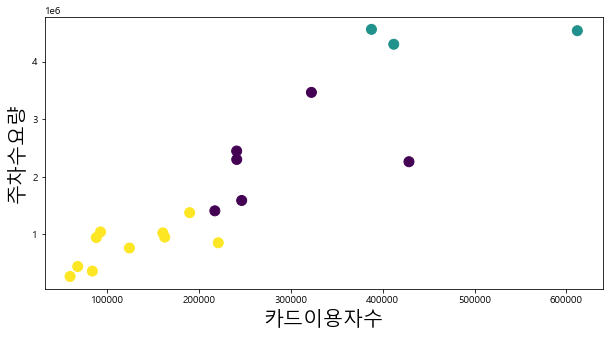

In [10]:
plt.figure(figsize=(10,5))
plt.xlabel('카드이용자수', fontsize=20)
plt.ylabel('주차수요량', fontsize=20)
plt.scatter(r['주차수요량'], r['카드이용자수'], c = r['군집'], alpha = 5, s = 100)
plt.show()

In [11]:
# centers = pd.DataFrame(model.cluster_centers_, columns = ['주차수요량', '카드이용자수'])
# center_x = centers['주차수요량']
# center_y = centers['카드이용자수']
# plt.scatter(r['주차수요량'], r['카드이용자수'], c = r['predict'], alpha = 0.5)
# plt.scatter(center_x, center_y, s=50, marker='D', c ='r')
# plt.show()

# 스케일링

In [12]:
scaler = StandardScaler()
model = KMeans(n_clusters=3)
pipeline = make_pipeline(scaler, model)

In [13]:
pipeline.fit(features)
predict = pd.DataFrame(pipeline.predict(features)+1)
predict.columns = ['군집']
predict

,군집
0,3
1,3
2,3
3,2
4,1
5,2
6,2
7,2
8,1
9,2


In [14]:
a = pd.concat([df['읍면동'] ,features, predict], axis = 1)
a.sort_values(['주차수요량'], ascending = False)

,읍면동,주차수요량,카드이용자수,사업체수,WiFi 접속자수,군집
0,이도동,611949,4538944,6694,4783256,3
3,애월읍,428583,2262602,2514,939748,2
1,연동,412007,4303620,4649,3126565,3
2,노형동,387717,4562480,4476,4834174,3
5,용담동,322347,3467293,1918,2471079,2
9,조천읍,246395,1589216,1873,1677427,2
6,아라동,241003,2301873,2049,1552059,2
7,일도동,240915,2448666,3536,3617973,2
11,오라동,220864,854466,978,300518,1
10,삼도동,217175,1409400,2396,2143600,2


In [15]:
a.to_csv('kmeans.csv', encoding = 'euc_kr')

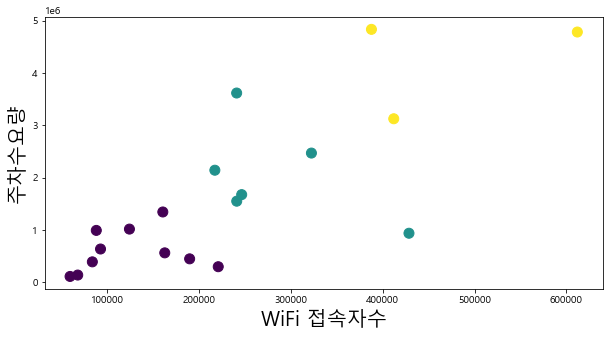

In [16]:
plt.figure(figsize=(10,5))
plt.xlabel('WiFi 접속자수', fontsize=20)
plt.ylabel('주차수요량', fontsize=20)
plt.scatter(a['주차수요량'], a['WiFi 접속자수'], c = a['군집'], alpha = 10, s = 100)
plt.show()